In [2]:
# Data Link-- https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

In [62]:
import numpy as np
import pandas as pd

In [63]:
#load csv file
Train = pd.read_csv("../input/twitter-sentiment-analysis-hatred-speech/train.csv")
data=Train
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [64]:
test_data = pd.read_csv("../input/twitter-sentiment-analysis-hatred-speech/test.csv")
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [65]:
data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [66]:
data.shape

(31962, 3)

In [67]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


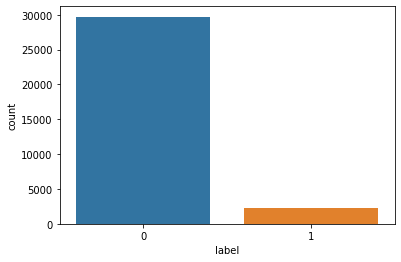

In [68]:
import seaborn as sns
ax=sns.countplot(data.label)

In [69]:
# removing usernames from tweet

data['new_tweet'] = data.tweet.str.replace('@user', '')
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [70]:
# removing usernames from test_data

test_data['new_tweet'] = test_data.tweet.str.replace('@user', '')
test_data.head()
ids = test_data['id']

In [71]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line 

data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
data['new_tweet'] = data['new_tweet'].str.replace("#", "")
data.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [72]:
test_data['new_tweet'] = test_data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
test_data['new_tweet'] = test_data['new_tweet'].str.replace("#", "")
test_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday to my amazing hilarious nephew e...


In [73]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(data['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('the', 10238),
 ('to', 9866),
 ('i', 7622),
 ('a', 6540),
 ('you', 5949),
 ('and', 4945),
 ('in', 4704),
 ('for', 4510),
 ('of', 4261),
 ('is', 4196)]

In [74]:
#tokenization
data['new_tweet'] = data['new_tweet'].apply(lambda x: x.split())
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [75]:
test_data['new_tweet'] = test_data['new_tweet'].apply(lambda x: x.split())
test_data.head()

,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,"[studiolife, aislife, requires, passion, dedic..."
1,31964,@user #white #supremacists want everyone to s...,"[white, supremacists, want, everyone, to, see,..."
2,31965,safe ways to heal your #acne!! #altwaystohe...,"[safe, ways, to, heal, your, acne, altwaystohe..."
3,31966,is the hp and the cursed child book up for res...,"[is, the, hp, and, the, cursed, child, book, u..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","[rd, bihday, to, my, amazing, hilarious, nephe..."


In [76]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

data['new_tweet']= data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [77]:
test_data['new_tweet']= test_data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
test_data.head()

,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,"[studiolif, aislif, requir, passion, dedic, wi..."
1,31964,@user #white #supremacists want everyone to s...,"[white, supremacist, want, everyon, to, see, t..."
2,31965,safe ways to heal your #acne!! #altwaystohe...,"[safe, way, to, heal, your, acn, altwaystoh, h..."
3,31966,is the hp and the cursed child book up for res...,"[is, the, hp, and, the, curs, child, book, up,..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","[rd, bihday, to, my, amaz, hilari, nephew, eli..."


In [78]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')



In [80]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)


In [81]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
    

In [82]:
data['new_tweet'] = data['new_tweet'].apply(process) 
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[father, kid, selfish, run, drag, dysfunct]"
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, disapoint, getthank, pdx, caus, wheelc..."
2,3,0,bihday your majesty,"[majesti, bihday]"
3,4,0,#model i love u take with u all the time in ...,"[love, time, take, model]"
4,5,0,factsguide: society now #motivation,"[motiv, factsguid, societi]"


In [83]:
# test_data
test_data['new_tweet'] = test_data['new_tweet'].apply(process) 
test_data.head()

,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,"[aislif, dedic, willpow, passion, requir, find..."
1,31964,@user #white #supremacists want everyone to s...,"[movi, whi, supremacist, want, bird, white, ev..."
2,31965,safe ways to heal your #acne!! #altwaystohe...,"[acn, heal, way, healthi, safe, altwaystoh]"
3,31966,is the hp and the cursed child book up for res...,"[yes, hp, favorit, reserv, alreadi, child, pot..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","[eli, love, rd, uncl, bihday, miss, hilari, da..."


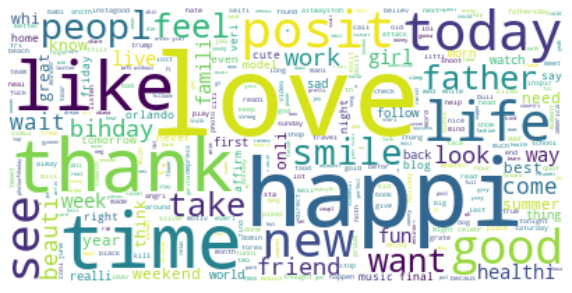

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# split sentences to get individual words
words = []
for line in data['new_tweet']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [85]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
data['new_tweet'] = data['new_tweet'].apply(string)
data.head()  

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,father kid selfish run drag dysfunct
1,2,0,@user @user thanks for #lyft credit i can't us...,thank disapoint getthank pdx caus wheelchair u...
2,3,0,bihday your majesty,majesti bihday
3,4,0,#model i love u take with u all the time in ...,love time take model
4,5,0,factsguide: society now #motivation,motiv factsguid societi


In [86]:
test_data['new_tweet'] = test_data['new_tweet'].apply(string)
test_data.head()

,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,aislif dedic willpow passion requir find studi...
1,31964,@user #white #supremacists want everyone to s...,movi whi supremacist want bird white everyon n...
2,31965,safe ways to heal your #acne!! #altwaystohe...,acn heal way healthi safe altwaystoh
3,31966,is the hp and the cursed child book up for res...,yes hp favorit reserv alreadi child pottermor ...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",eli love rd uncl bihday miss hilari dave ahmir...


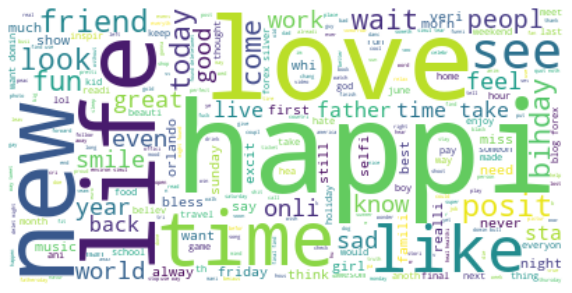

In [87]:
positive = [r for r in data['new_tweet'][data['label']==0]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

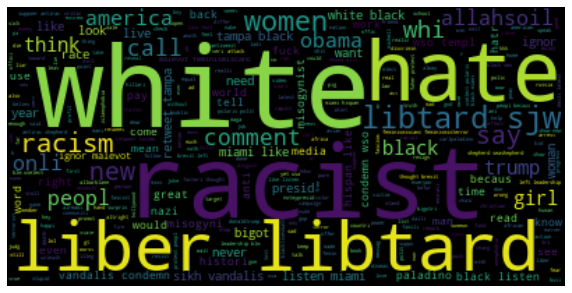

In [88]:
negative = [r for r in data['new_tweet'][data['label']==1]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Bag of words 

In [89]:
data.drop(["id","tweet" ],axis=1,inplace=True)
data.head()

,label,new_tweet
0,0,father kid selfish run drag dysfunct
1,0,thank disapoint getthank pdx caus wheelchair u...
2,0,majesti bihday
3,0,love time take model
4,0,motiv factsguid societi


In [90]:
test_data.drop(["id","tweet" ],axis=1,inplace=True)
test_data.head()

,new_tweet
0,aislif dedic willpow passion requir find studi...
1,movi whi supremacist want bird white everyon n...
2,acn heal way healthi safe altwaystoh
3,yes hp favorit reserv alreadi child pottermor ...
4,eli love rd uncl bihday miss hilari dave ahmir...


In [91]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["new_tweet"], 
                                                    data["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (25569,) (25569,)
testing set : (6393,) (6393,)


In [92]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)


In [93]:
test_x = test_data['new_tweet']
test_x

0        aislif dedic willpow passion requir find studi...
1        movi whi supremacist want bird white everyon n...
2                     acn heal way healthi safe altwaystoh
3        yes hp favorit reserv alreadi child pottermor ...
4        eli love rd uncl bihday miss hilari dave ahmir...
                               ...                        
17192    trump gt factori thought brexit left leadershi...
17193    dress mermaid wed formal gown neverreadi hairf...
17194    campaign word thee liabil radic hillari ohio o...
17195    lead confer mindset develop happi work cultur ...
17196       newmus glad download newsong shoegaz song free
Name: new_tweet, Length: 17197, dtype: object

In [94]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 27304)
(25569, 27304)


In [95]:
test_x_counts = count_vect.transform(test_x)
test_x_tfidf = transformer.transform(test_x_counts)

print(test_x_counts.shape)
print(test_x_tfidf.shape)

(17197, 27304)
(17197, 27304)


In [96]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 27304)
(6393, 27304)


### Model building

#### Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [98]:
predictions = model.predict(x_test_tfidf)

In [99]:
submission  = model.predict(test_x_tfidf)

In [100]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

96.18332551227905

In [101]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[5897,   40],
       [ 204,  252]])

In [102]:
#f1-score
f1_score(y_test,predictions)

0.6737967914438503

In [103]:
from __future__ import print_function


# Special END separator
END = '0e8ed89a-47ba-4cdb-938e-b8af8e084d5c'

# Text attributes
ALL_OFF = '\033[0m'
BOLD = '\033[1m'
UNDERSCORE = '\033[4m'
BLINK = '\033[5m'
REVERSE = '\033[7m'
CONCEALED = '\033[7m'

# Foreground colors
FG_BLACK = '\033[30m'
FG_RED = '\033[31m'
FG_GREEN = '\033[32m'
FG_YELLOW = '\033[33m'
FG_BLUE = '\033[34m'
FG_MAGENTA = '\033[35m'
FG_CYAN = '\033[36m'
FG_WHITE = '\033[37m'

# Background colors
BG_BLACK = '\033[40m'
BG_RED = '\033[41m'
BG_GREEN = '\033[42m'
BG_YELLOW = '\033[43m'
BG_BLUE = '\033[44m'
BG_MAGENTA = '\033[45m'
BG_CYAN = '\033[46m'
BG_WHITE = '\033[47m'


class pretty_output():
    '''
    Context manager for pretty terminal prints
    '''

    def __init__(self, *attr):
        self.attributes = attr

    def __enter__(self):
        return self

    def __exit__(self, type, value, traceback):
        pass

    def write(self, msg):
        style = ''.join(self.attributes)
        print('{}{}{}'.format(style, msg.replace(END, ALL_OFF + style), ALL_OFF))


if __name__ == '__main__':

    with pretty_output(FG_RED) as out:
        out.write('This is a test in RED')

    with pretty_output(FG_BLUE) as out:
        out.write('This is a test in BLUE')

    with pretty_output(BOLD, FG_GREEN) as out:
        out.write('This is a bold text in green')

    with pretty_output(BOLD, BG_GREEN) as out:
        out.write('This is a text with green background')

    with pretty_output(FG_GREEN) as out:
        out.write('This is a green text with ' + BOLD + 'bold' + END + ' text included')

    with pretty_output() as out:
        out.write(BOLD + 'Use this' + END + ' even with ' + BOLD + FG_RED + 'no parameters' + END + ' in the with statement')

This is a test in RED
This is a test in BLUE
This is a bold text in green
This is a text with green background
This is a green text with bold text included
Use this even with no parameters in the with statement


In [104]:
from sklearn.metrics import classification_report
df = pd.DataFrame(classification_report(predictions, 
                                        y_test, digits=2,
                                        output_dict=True)).T

with pretty_output(BOLD, FG_GREEN) as out:
    out.write('                 RANDOM FOREST                 ')
df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'1', :'f1-score'],)


                 RANDOM FOREST                 


,precision,recall,f1-score,support
0,0.993263,0.966563,0.979731,6101.000000
1,0.552632,0.863014,0.673797,292.000000
accuracy,0.961833,0.961833,0.961833,0.961833
macro avg,0.772947,0.914788,0.826764,6393.000000
weighted avg,0.973137,0.961833,0.965757,6393.000000


In [105]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == 'NEG' else 'green'
    return 'color: %s' % color

In [106]:
tweets = pd.DataFrame(columns=['Tweets','Prediction','Label'])
tweets['Tweets'] = x_test
tweets['Prediction'] = predictions
tweets['Label'] = y_test
tweets.replace([0,1],['POS', 'NEG'], inplace=True)
with pretty_output(BOLD, FG_GREEN) as out:
    out.write('                 RANDOM FOREST Tweets Prediction                ')
(tweets.sample(10).style.applymap(color_negative_red, subset=['Prediction', 'Label']))

                 RANDOM FOREST Tweets Prediction                


,Tweets,Prediction,Label
29474,bring thegoodoldday memori back mani song,POS,POS
6235,yes wait,POS,POS
15483,hi purpl hello creatur sketch greet land alien mutant,POS,POS
7690,give condit onli happi thich hanh freedom nhat,POS,POS
13634,bye never bacon eat,POS,POS
6419,face breed believ white black eah miscegen genocid ppl stop,NEG,POS
22103,confus caus must angst evil want muslim gay yap peopl,POS,POS
30136,cemeteri two yet camera flower woman local steal caught,POS,POS
5455,runhappi race fun urbac runvi victoriabuzz readi superhero,POS,POS
16124,hope today bought time later squidg workintheway busi page,POS,POS


In [107]:
predictions

array([0, 0, 1, ..., 0, 0, 1])

In [108]:
test_data.head()

,new_tweet
0,aislif dedic willpow passion requir find studi...
1,movi whi supremacist want bird white everyon n...
2,acn heal way healthi safe altwaystoh
3,yes hp favorit reserv alreadi child pottermor ...
4,eli love rd uncl bihday miss hilari dave ahmir...


In [110]:
submission_df = pd.DataFrame(columns=['id', 'label'])
submission_df['id'] = ids
submission_df['label'] = submission
submission_df.head(5)

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0


In [111]:
submission_df.to_csv('submission.csv',index=False)

### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=400)

In [113]:
log_predictions = logmodel.predict(x_test_tfidf)

In [114]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[5925,   12],
       [ 309,  147]])

In [115]:
f1_score(y_test,log_predictions)

0.47804878048780486

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)*100

94.97888315344909

In [117]:
submission  = model.predict(test_x_tfidf)
submission_df = pd.DataFrame(columns=['id', 'label'])
submission_df['id'] = ids
submission_df['label'] = submission
submission_df.to_csv('submission-log.csv',index=False)
submission_df.head(5)

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0


### Gradient Boosting Regressor

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

alg= GradientBoostingRegressor(n_estimators= 550, learning_rate= 0.1, max_depth= 3)
alg.fit(x_train_tfidf,y_train)

GradientBoostingRegressor(n_estimators=550)

In [119]:
alg_predictions = logmodel.predict(x_test_tfidf)

In [120]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,alg_predictions)

array([[5925,   12],
       [ 309,  147]])

In [121]:
f1_score(y_test,alg_predictions)

0.47804878048780486

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,alg_predictions)*100

94.97888315344909

In [123]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


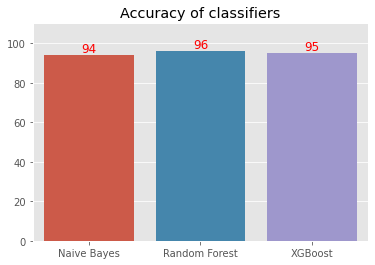

In [124]:
models = ["Naive Bayes", 'Random Forest', 'XGBoost']
acc = [94, 96, 95]
plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
sns.barplot(models, acc, );
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = 110 
ax.set_ylim([0, y_max])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.title('Accuracy of classifiers')
plt.show()

In [125]:
submission  = model.predict(test_x_tfidf)
submission_df = pd.DataFrame(columns=['id', 'label'])
submission_df['id'] = ids
submission_df['label'] = submission
submission_df.to_csv('submission_gb.csv',index=False)
submission_df.head(5)

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
